In [128]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
labels = iris.target

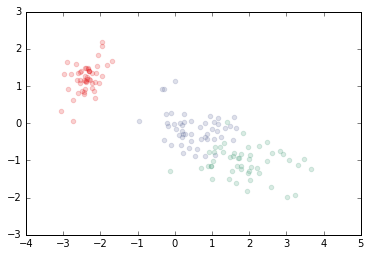

In [130]:
canvas_sub = MDS(2, max_iter=100, n_init=1).fit_transform(X)
for i, points in enumerate(canvas_sub):
    xx, yy = points
    label = labels[i]
    plt.scatter(xx, yy, alpha=.2, color=plt.cm.Set1(label/10.))


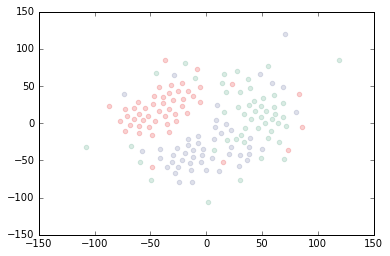

In [131]:
canvas_sub = TSNE(perplexity=30, init='pca').fit_transform(X)
for i, points in enumerate(canvas_sub):
    xx, yy = points
    label = labels[i]
    plt.scatter(xx, yy, alpha=.2, color=plt.cm.Set1(label/10.))


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
labels = iris.target


canvas_sub = MDS(2, max_iter=100, n_init=1).fit_transform(X)
for i, points in enumerate(canvas_sub):
    xx, yy = points
    label = labels[i]
    plt.scatter(xx, yy, alpha=.2, color=plt.cm.Set1(label/10.))


In [122]:
# make 3d blobs
# iris
# digits
# faces
from sklearn.datasets import fetch_olivetti_faces
# http://www.cl.cam.ac.uk/research/dtg/attarchive/facesataglance.html
faces_data = fetch_olivetti_faces()['data']

mask = fetch_olivetti_faces()['target'] <= 30

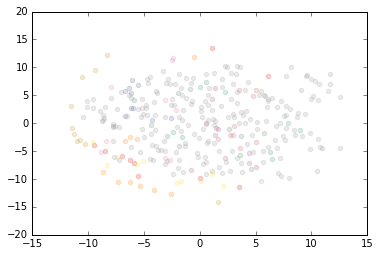

In [123]:
canvas_sub = MDS(2, max_iter=100, n_init=1).fit_transform(faces_data[mask])
for i, points in enumerate(canvas_sub):
    xx, yy = points
    label = fetch_olivetti_faces()['target'][i]
    plt.scatter(xx, yy, alpha=.2, color=plt.cm.Set1(label/10.))


In [ ]:
canvas_sub = TSNE(perplexity=30, init='pca').fit_transform(faces_data[mask])
plt.scatter(canvas_sub[:,0], canvas_sub[:,1], alpha=.2, color='red')


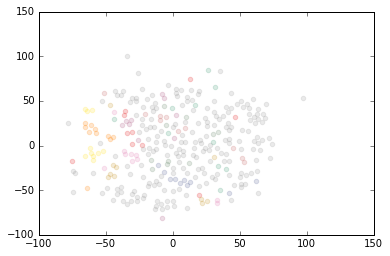

In [124]:

canvas_sub = TSNE(perplexity=30, init='pca').fit_transform(faces_data[mask])
for i, points in enumerate(canvas_sub):
    xx, yy = points
    label = fetch_olivetti_faces()['target'][i]
    plt.scatter(xx, yy, alpha=.2, color=plt.cm.Set1(label/10.))


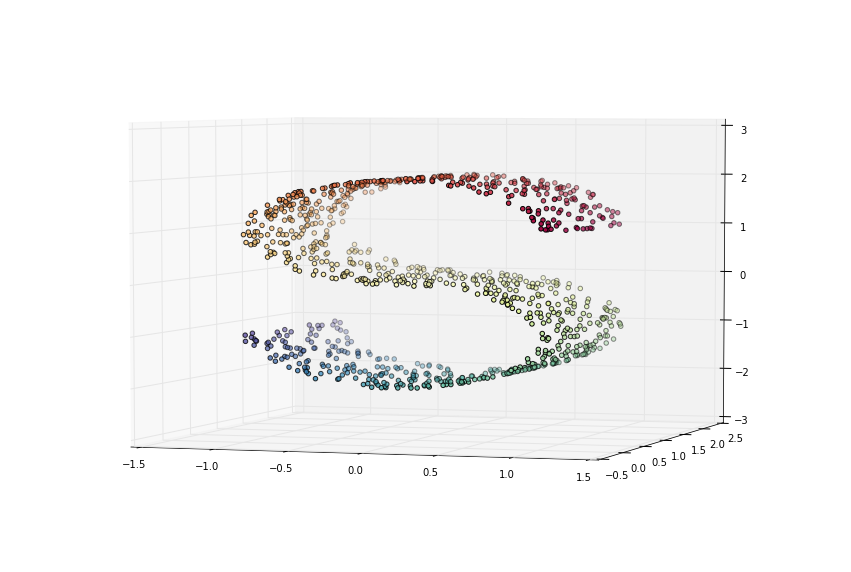

In [76]:
X, color = datasets.make_s_curve(n_samples=1000,noise=0.0)

# fig = plt.figure(figsize=(15, 8))
# ax = fig.add_subplot(251, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

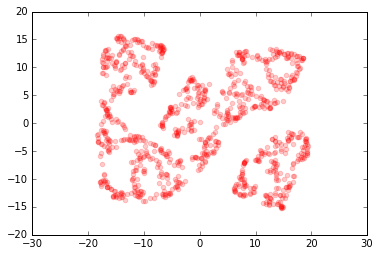

In [79]:
canvas_sub = TSNE(perplexity=30, init='pca').fit_transform(X)
plt.scatter(canvas_sub[:,0], canvas_sub[:,1], alpha=.2, color='red')

MDS: 3.2 sec


(-1.5918008738095772,
 1.6041369044551648,
 -2.5255639286805445,
 2.5333144221092705)

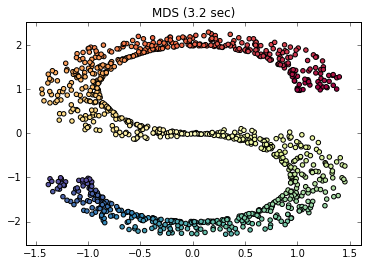

In [83]:
#I'm still rather unclear why one would one would use MDS over TSNE
from sklearn.manifold import MDS
from time import time

t0 = time()
mds = MDS(2, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

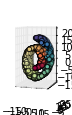

In [71]:
from sklearn import cluster, datasets

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

X, color = datasets.make_swiss_roll(n_samples=1000,noise=0.0)

# fig = plt.figure(figsize=(15, 8))
# ax = fig.add_subplot(251, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)


fig = plt.figure()
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)


# ax.set_title("Original data")
# ax = fig.add_subplot(212)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# plt.axis('tight')
# plt.xticks([]), plt.yticks([])
# plt.title('Projected data')
# plt.show()

In [40]:
import pandas as pd

%pylab inline

from sklearn.manifold import TSNE
from sklearn import cluster, datasets
from helpers import scale_feature_matrix


np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'SpectralClustering', 'Ward', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


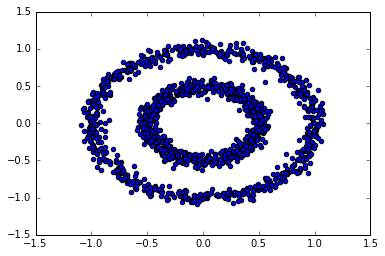

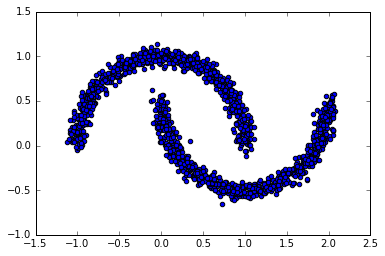

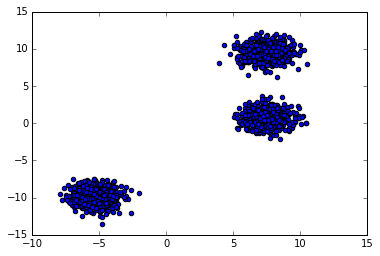

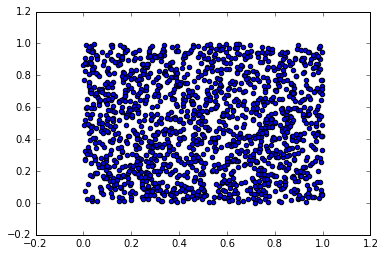

In [39]:
datasets_ = [noisy_circles, noisy_moons, blobs, no_structure]

for ds in datasets_:
    X = ds[0]
    plt.scatter(X[:,0], X[:,1])
    plt.show()


In [35]:
canvas_sub = TSNE(perplexity=30).fit_transform(noisy_circles[0])


In [ ]:
'''
is there a rigorous way to find the best parameters for a t-sne? e.g. gridsearch 

The embeddings being the best plot. Something that represents the original dataset very well.
To be more specific, from a global and local structure perspective if there are 4 well defined 
groups in the data the plot should represent that the minimum.

I'm not sure if you've had a chance to check out this link here but the argument they're making is effectively but they're
'''

In [141]:
grid_search_params = {
    
    # inits with PCA gives a better global structure
    'init': ['pca', 'random'],
    
    # 'precomputed' is also an option or 
    # also passing in a custom dist function
    'metric': ['euclidean'],
    
    #increases/decreases accuracy for the Barnes hut algo 
    'angle': [0.5],
    
    #defaults at 1000 but 5000 is known to work the best
    'n_iter': [1000,3000,5000],
    'learning_rate': [100, 500, 1000],
    'perplexity': range(5,50,10),
    'n_iter_without_progress': 30
    
}


1.69037294388 {'perplexity': 5, 'n_iter': 1000, 'init': 'pca'}


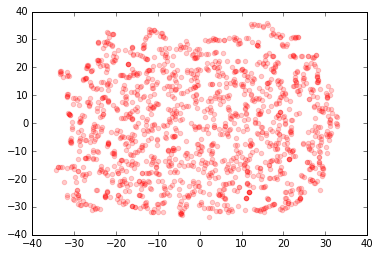

1.74358081818 {'perplexity': 5, 'n_iter': 1000, 'init': 'random'}


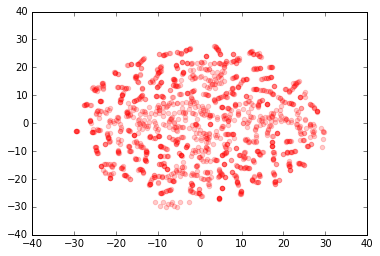

1.69037294388 {'perplexity': 5, 'n_iter': 3000, 'init': 'pca'}


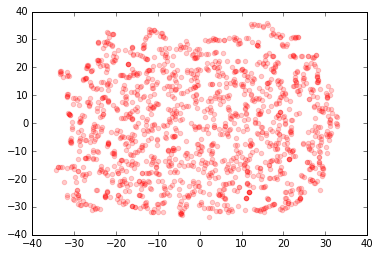

1.78686785698 {'perplexity': 5, 'n_iter': 3000, 'init': 'random'}


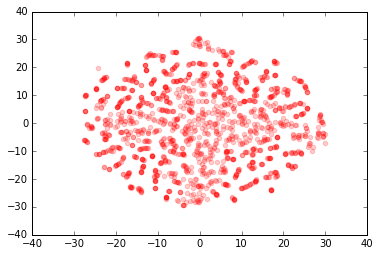

1.69037294388 {'perplexity': 5, 'n_iter': 5000, 'init': 'pca'}


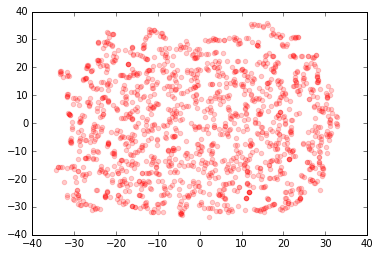

1.76690912247 {'perplexity': 5, 'n_iter': 5000, 'init': 'random'}


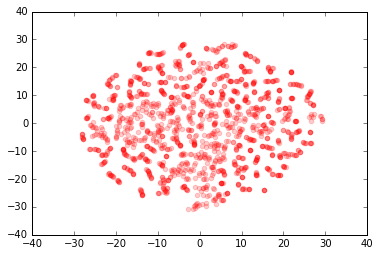

0.885757386684 {'perplexity': 15, 'n_iter': 1000, 'init': 'pca'}


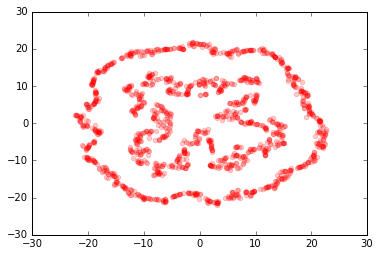

1.00788700581 {'perplexity': 15, 'n_iter': 1000, 'init': 'random'}


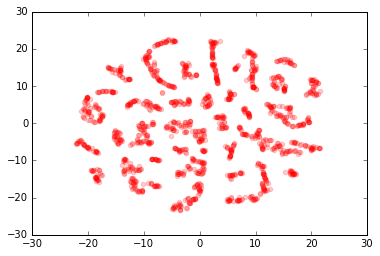

0.885757386684 {'perplexity': 15, 'n_iter': 3000, 'init': 'pca'}


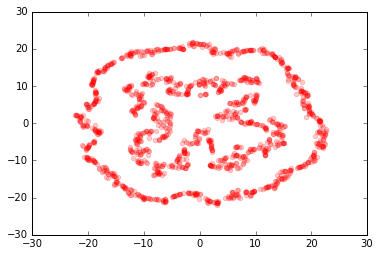

0.978604614735 {'perplexity': 15, 'n_iter': 3000, 'init': 'random'}


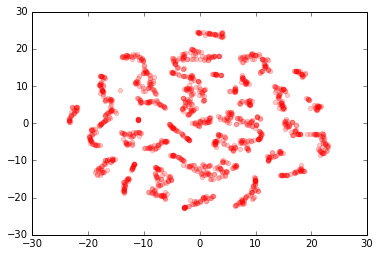

0.885757386684 {'perplexity': 15, 'n_iter': 5000, 'init': 'pca'}


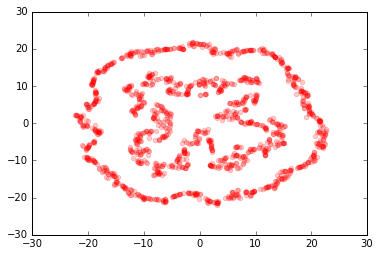

0.999784708023 {'perplexity': 15, 'n_iter': 5000, 'init': 'random'}


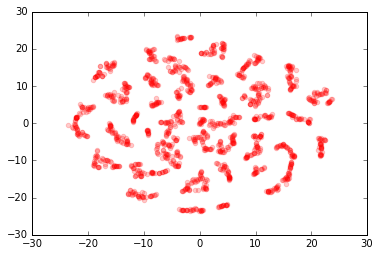

0.652649581432 {'perplexity': 25, 'n_iter': 1000, 'init': 'pca'}


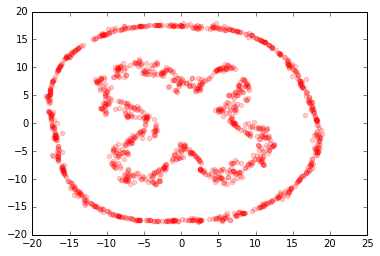

0.801607549191 {'perplexity': 25, 'n_iter': 1000, 'init': 'random'}


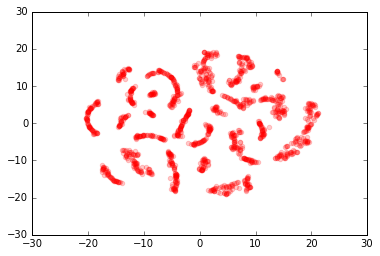

0.652650177479 {'perplexity': 25, 'n_iter': 3000, 'init': 'pca'}


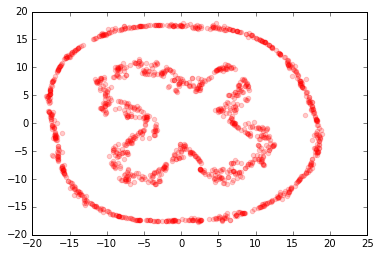

0.761724054813 {'perplexity': 25, 'n_iter': 3000, 'init': 'random'}


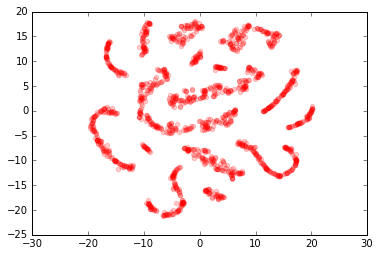

0.652649581432 {'perplexity': 25, 'n_iter': 5000, 'init': 'pca'}


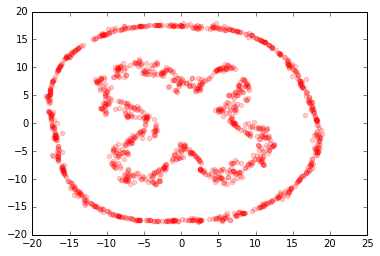

0.757191538811 {'perplexity': 25, 'n_iter': 5000, 'init': 'random'}


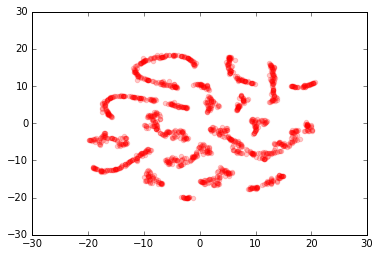

0.536748230457 {'perplexity': 35, 'n_iter': 1000, 'init': 'pca'}


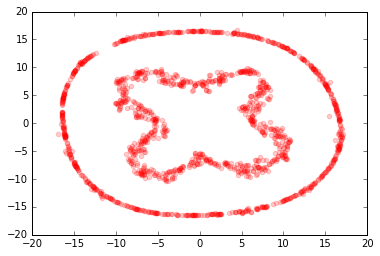

0.628537416458 {'perplexity': 35, 'n_iter': 1000, 'init': 'random'}


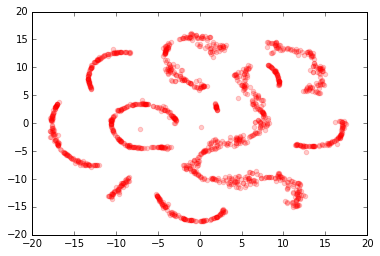

0.536748230457 {'perplexity': 35, 'n_iter': 3000, 'init': 'pca'}


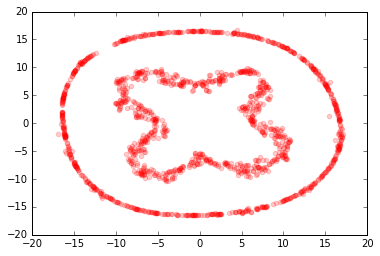

0.640825033188 {'perplexity': 35, 'n_iter': 3000, 'init': 'random'}


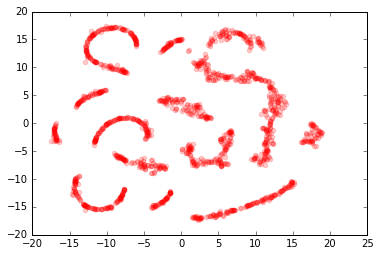

0.536748230457 {'perplexity': 35, 'n_iter': 5000, 'init': 'pca'}


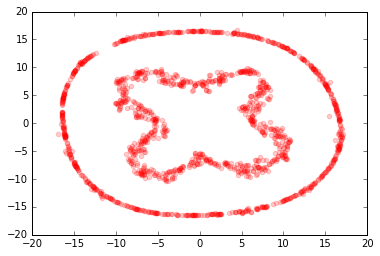

0.664975166321 {'perplexity': 35, 'n_iter': 5000, 'init': 'random'}


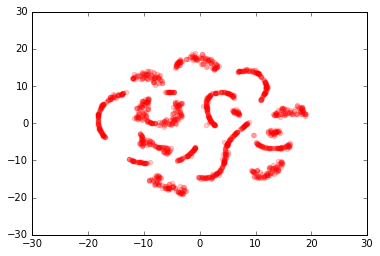

0.467542976141 {'perplexity': 45, 'n_iter': 1000, 'init': 'pca'}


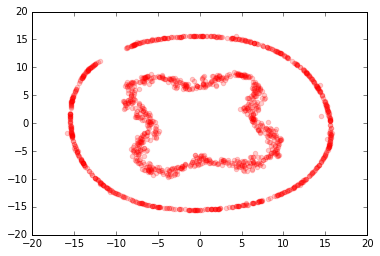

0.544953942299 {'perplexity': 45, 'n_iter': 1000, 'init': 'random'}


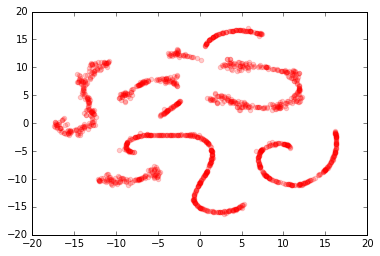

0.467542976141 {'perplexity': 45, 'n_iter': 3000, 'init': 'pca'}


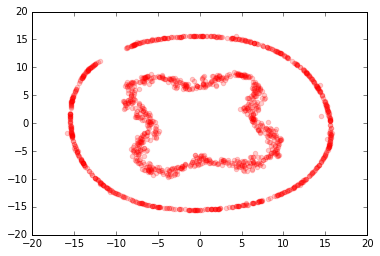

0.528550863266 {'perplexity': 45, 'n_iter': 3000, 'init': 'random'}


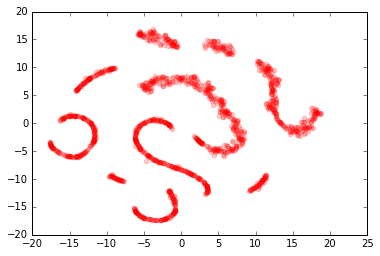

0.467542976141 {'perplexity': 45, 'n_iter': 5000, 'init': 'pca'}


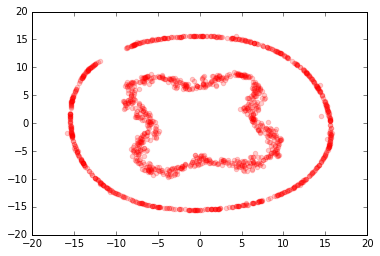

0.520900785923 {'perplexity': 45, 'n_iter': 5000, 'init': 'random'}


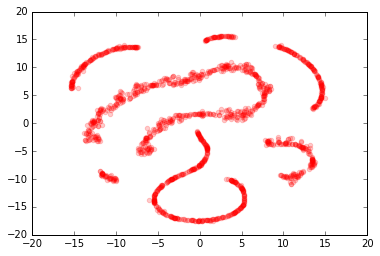

In [164]:
from pprint import pprint

def find_best_tsne(feature_M, verbose=None):
    
    #use multithreading to speed-up
    best_kl_error = None
    best_params = None
    params = {}

    for perp in grid_search_params['perplexity']:
        params['perplexity'] = perp
        for n_steps in grid_search_params['n_iter']:
            params['n_iter'] = n_steps
            for init in grid_search_params['init']:
                params['init'] = init
                
                fitted_tsne = TSNE(**params).fit(feature_M)
                embeddings, curr_error = fitted_tsne.embedding_, fitted_tsne.kl_divergence_
                
                #greedy search tool
                if not best_kl_error or best_kl_error > curr_error:
                    best_kl_error = curr_error
                    best_params = params
                    
                #print plot for every configuration
                if verbose:
                    
                    print curr_error, params
                    plt.scatter(embeddings[:,0], embeddings[:,1], alpha=.2, color='red')
                    plt.show()
    
    return best_params, embeddings

best_params, best_plot = find_best_tsne(noisy_circles[0], verbose=True)

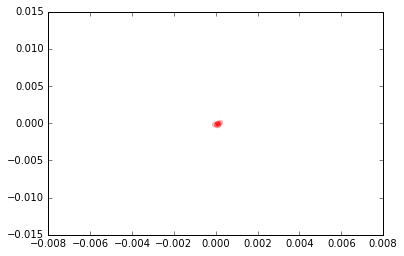

In [163]:
plt.scatter(best_plot[:,0], best_plot[:,1], alpha=.2, color='red')